In [15]:
import numpy as np

In [16]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

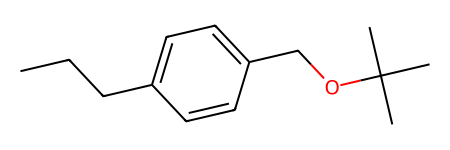

In [17]:
smiles = "C1=CC(=CC=C1COC(C)(C)C)CCC"

chm = Chem.MolFromSmiles(smiles)

chm

In [18]:
ch2 = chm.GetSubstructMatches(Chem.MolFromSmarts("[CX4H2]"))
ch2

((6,), (12,), (13,))

In [19]:
ch2_flat = np.array(ch2).flatten()
ch2_flat

array([ 6, 12, 13])

In [20]:
hide = chm.GetSubstructMatches(Chem.MolFromSmarts("[c][CH2]"))

hide_flat = np.array(hide).flatten()
hide_flat

array([ 2, 12,  5,  6])

In [21]:
hide2 = chm.GetSubstructMatches(Chem.MolFromSmarts("[CH2]O[!$([CH](=O));!$(C(=O)[!O]);CH2,CH,CH0,c&!CH3]"))

hide2_flat = np.array(hide2).flatten()
hide2_flat

array([6, 7, 8])

In [22]:
hides = np.append(hide, hide2)

In [23]:
elementos_faltantes = np.setdiff1d(ch2_flat, hide)
len(elementos_faltantes)

1

In [24]:
import ugropy as ug

In [25]:
g = ug.Groups(smiles, "smiles")

In [26]:
g.unifac_groups

{'CH3': 4, 'C': 1, 'ACH': 4, 'ACCH2': 2, 'CH2O': 1}

In [27]:
ug.core.checks.check_has_hided_ch2_ch(
    chm,
    g.unifac_groups,
    ug.constants.unifac_subgroups
)

True